#  Plotting with Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [3]:
plt.style.use('seaborn-v0_8-colorblind')

## DataFrame.plot

In [10]:
np.random.seed(123)

df = pd.DataFrame({'A': np.random.randn(365).cumsum(0), 
                   'B': np.random.randn(365).cumsum(0) + 20,
                   'C': np.random.randn(365).cumsum(0) - 20}, 
                  index=pd.date_range('1/1/2017', periods=365))
df.head()

,A,B,C
2017-01-01,-1.085631,20.059291,-20.230904
2017-01-02,-0.088285,21.803332,-16.659325
2017-01-03,0.194693,20.835588,-17.055481
2017-01-04,-1.311601,21.255156,-17.093802
2017-01-05,-1.890202,21.462083,-19.518638


<IPython.core.display.Javascript object>


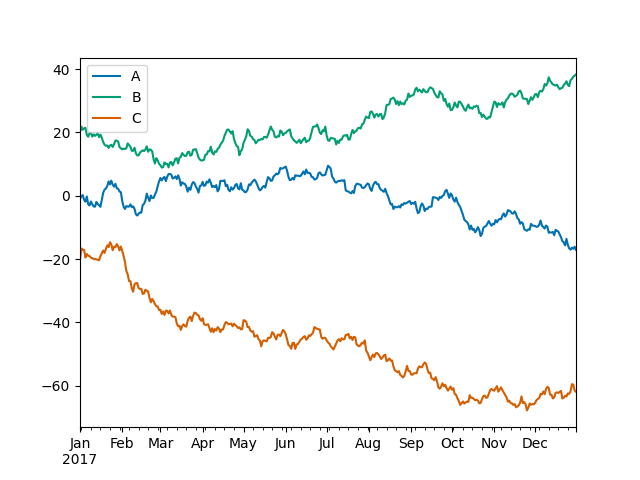

<AxesSubplot: >

In [6]:
# we can directly use the pandas' plot method
df.plot()

<IPython.core.display.Javascript object>


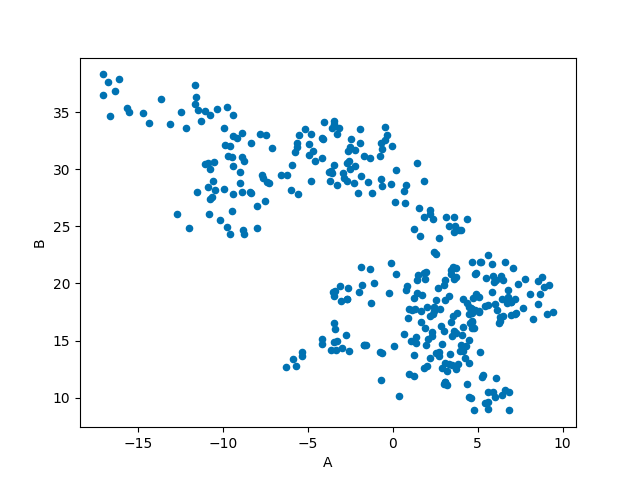

In [7]:
# also we can chose the data to plot and its style
df.plot('A', 'B', kind = 'scatter');

<IPython.core.display.Javascript object>


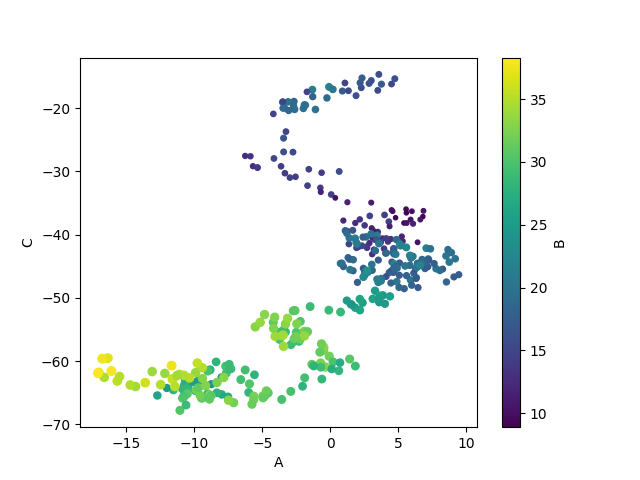

<AxesSubplot: xlabel='A', ylabel='C'>

In [8]:
# we can perform more complex graph
df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='viridis')
# here we plot A against C, the color and the size of each point
# is given by the B column

<IPython.core.display.Javascript object>


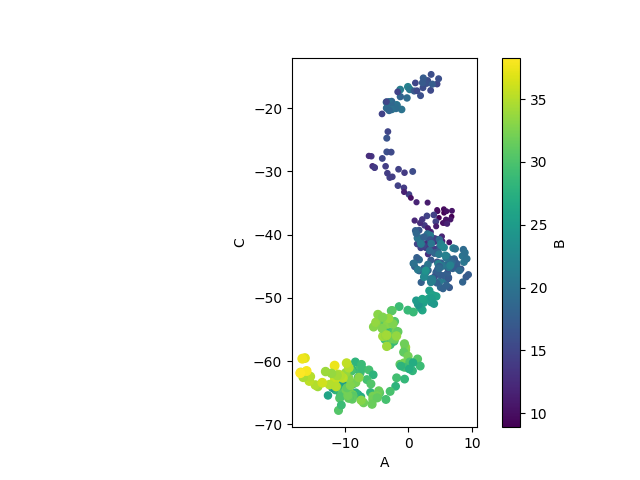

In [11]:
# because behind this is matplotlib we can add modifications
ax = df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='viridis')
# we can set both axis has the same scale and proportion
ax.set_aspect('equal')

<IPython.core.display.Javascript object>


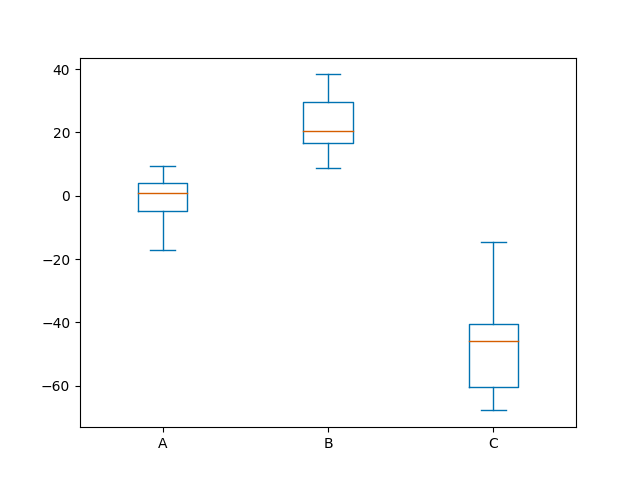

In [15]:
# also we can do box plots
df.plot.box();

<IPython.core.display.Javascript object>


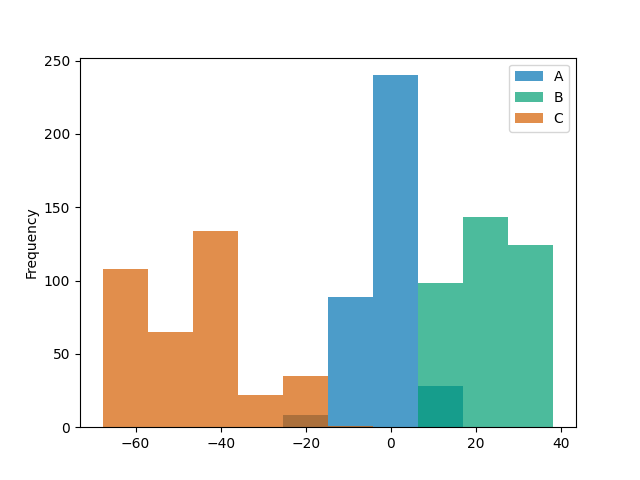

In [16]:
# histograms
df.plot.hist(alpha=0.7);

<IPython.core.display.Javascript object>


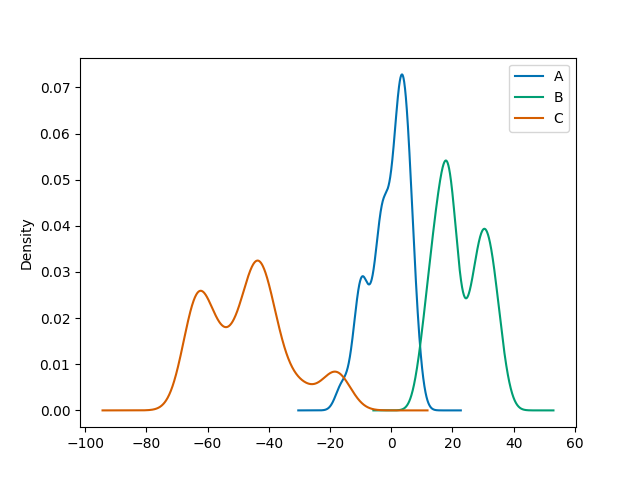

In [17]:
# and kernel density estimate plots, where we visualize
# the probabily density function
df.plot.kde();

## pandas.tools.plotting

In [18]:
# let's bring in a dataset
iris = pd.read_csv('./Datasets/iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<IPython.core.display.Javascript object>


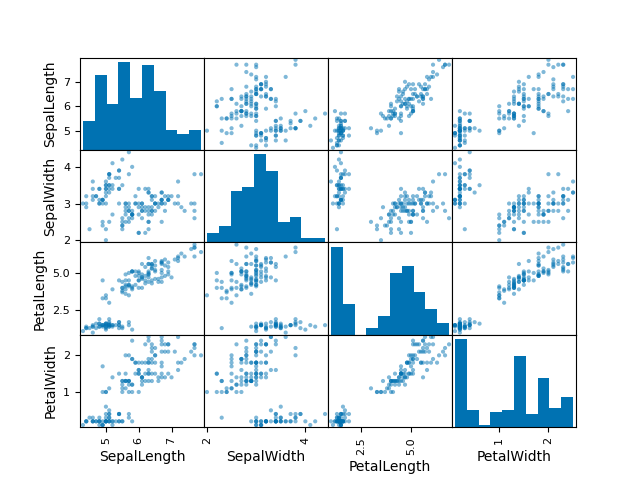

In [20]:
# this plot histogram on the diagonal and scatter plots on other inputs
pd.plotting.scatter_matrix(iris);

<IPython.core.display.Javascript object>


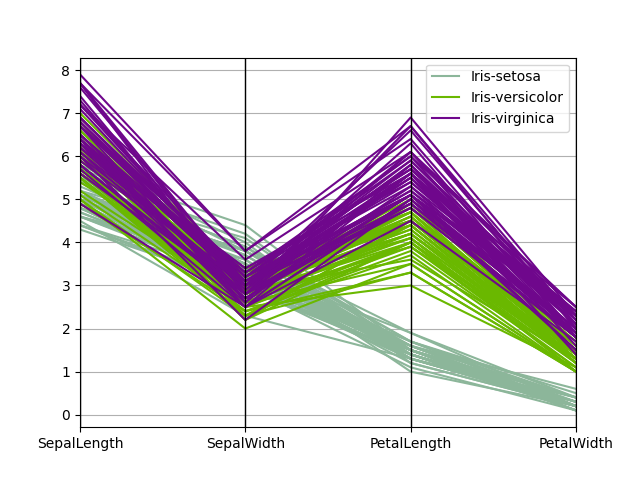

In [21]:
plt.figure()
pd.plotting.parallel_coordinates(iris, 'Name');

# Seaborn

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

In [24]:
# let's start creating some samples
np.random.seed(1234)

v1 = pd.Series(np.random.normal(0, 10, 1000), name='v1')
v2 = pd.Series(2*v1 + np.random.normal(60, 15, 1000), name='v2')

<IPython.core.display.Javascript object>


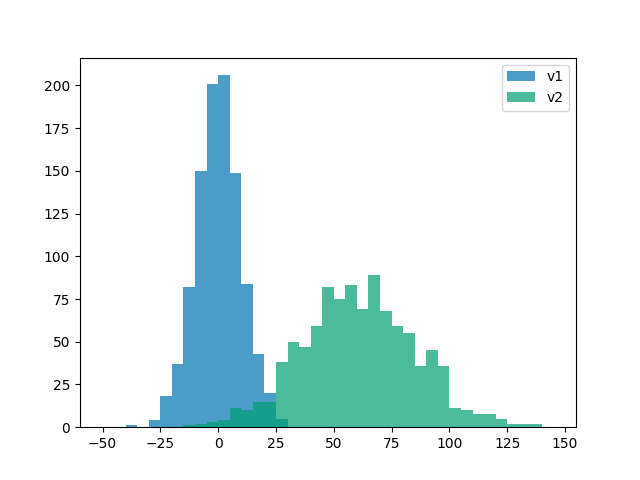

In [25]:
# let's plot their histogram
plt.figure()
plt.hist(v1, alpha=0.7, bins=np.arange(-50, 150, 5), label='v1')
plt.hist(v2, alpha=0.7, bins=np.arange(-50, 150, 5), label='v2')
plt.legend();

<IPython.core.display.Javascript object>


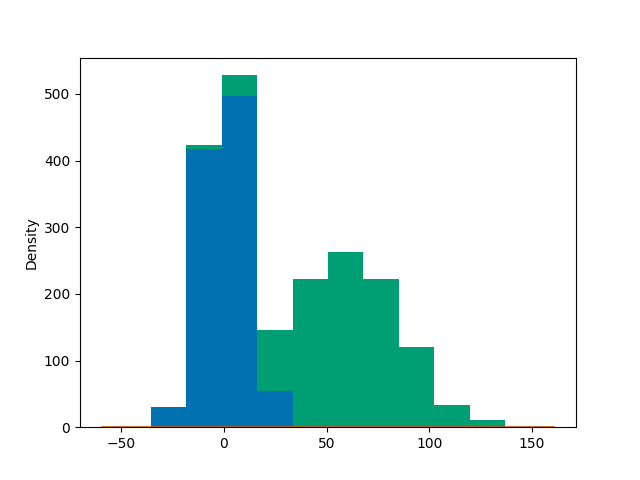

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/segismundo/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3378, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_4187/3756039241.py", line 3, in <module>
    plt.hist([v1, v2], histtype='barstacked', normed=True);
  File "/home/segismundo/.local/lib/python3.10/site-packages/matplotlib/pyplot.py", line 2563, in hist
    return __ret
  File "/home/segismundo/.local/lib/python3.10/site-packages/matplotlib/__init__.py", line 1423, in inner
    return func(ax, *map(sanitize_sequence, args), **kwargs)
  File "/home/segismundo/.local/lib/python3.10/site-packages/matplotlib/axes/_axes.py", line 6860, in hist
  File "/home/segismundo/.local/lib/python3.10/site-packages/matplotlib/artist.py", line 1186, in _internal_update
    return self._update_props(
  File "/home/segismundo/.local/lib/python3.10/site-packages/matplotlib/artist.py", line 1160, in _update_props
    raise Attrib

In [31]:
# now let's plot this but in a different way
plt.figure()
plt.hist([v1, v2], histtype='barstacked', normed=True);

<IPython.core.display.Javascript object>


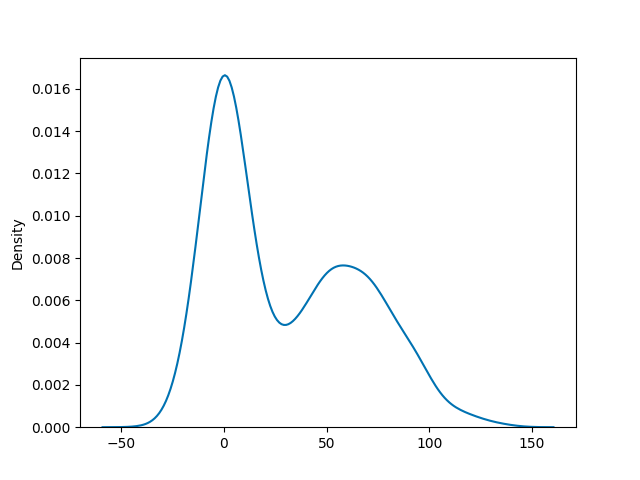

In [34]:
plt.figure()
# we concatenate v1 and v2
v3 =  np.concatenate((v1, v2))
# and plot the kernel density estimate
sns.kdeplot(v3);

<IPython.core.display.Javascript object>


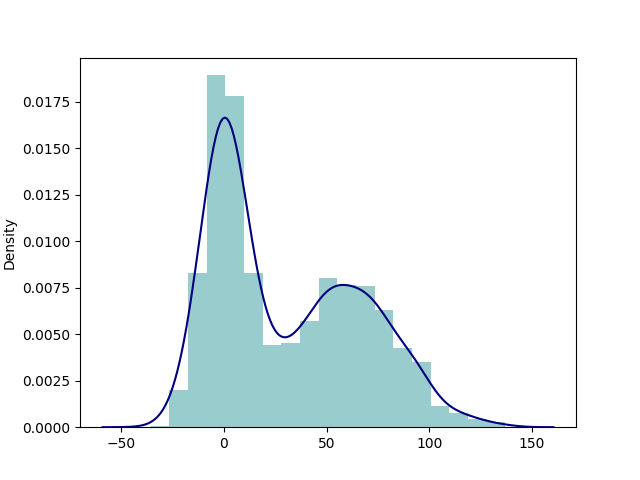

/tmp/ipykernel_4187/2564691962.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v3, hist_kws={'color': 'Teal'}, kde_kws={'color': 'Navy'});


In [36]:
# and plot them together
plt.figure()
sns.distplot(v3, hist_kws={'color': 'Teal'}, kde_kws={'color': 'Navy'});

In [41]:
# and we can plot scatter plots using histograms
sns.jointplot(v1, v2, alpha=0.4);

TypeError: jointplot() takes from 0 to 1 positional arguments but 2 were given

In [42]:
# let's look how seaborn handle categorical data
iris = pd.read_csv('./Datasets/iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<IPython.core.display.Javascript object>


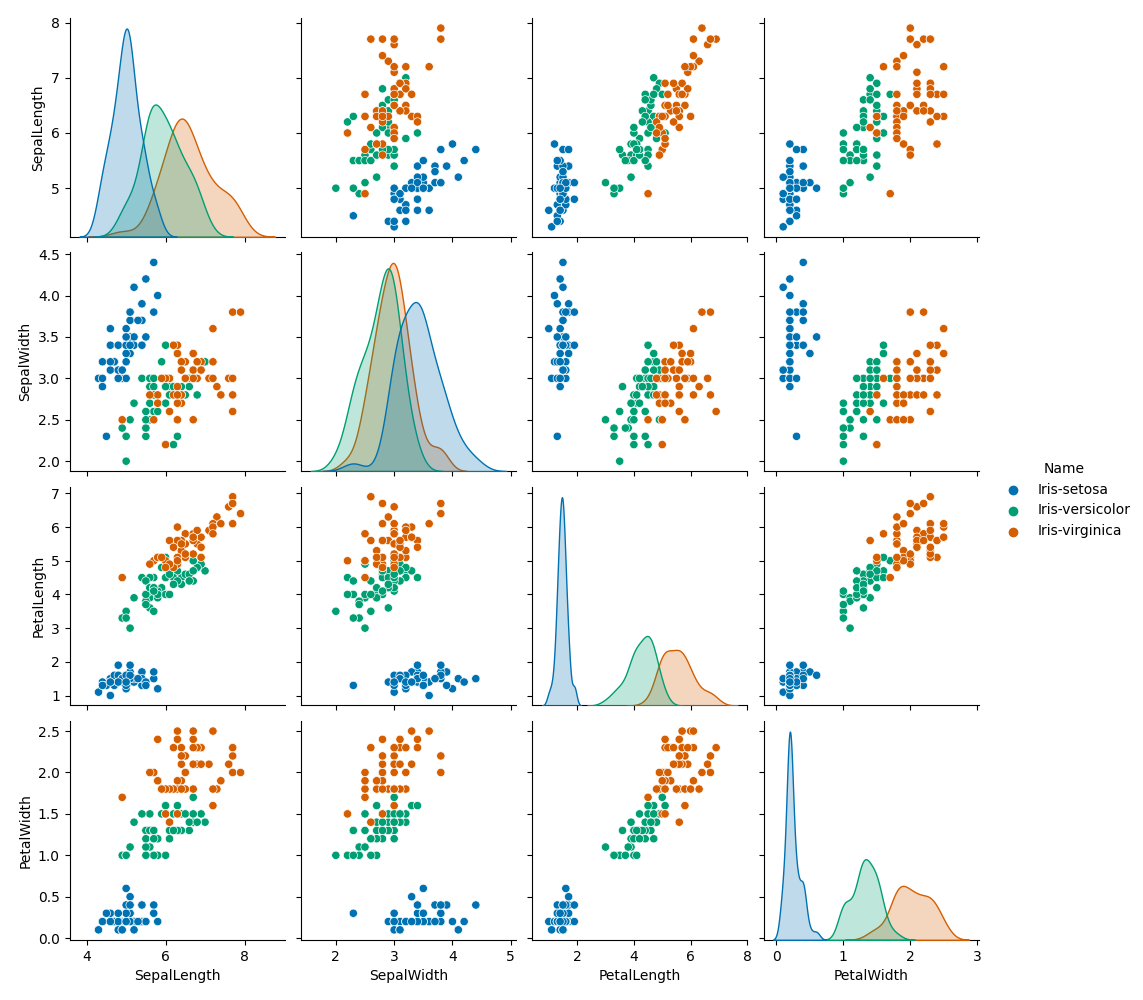

In [43]:
sns.pairplot(iris, hue='Name', diag_kind = 'kde');

<IPython.core.display.Javascript object>


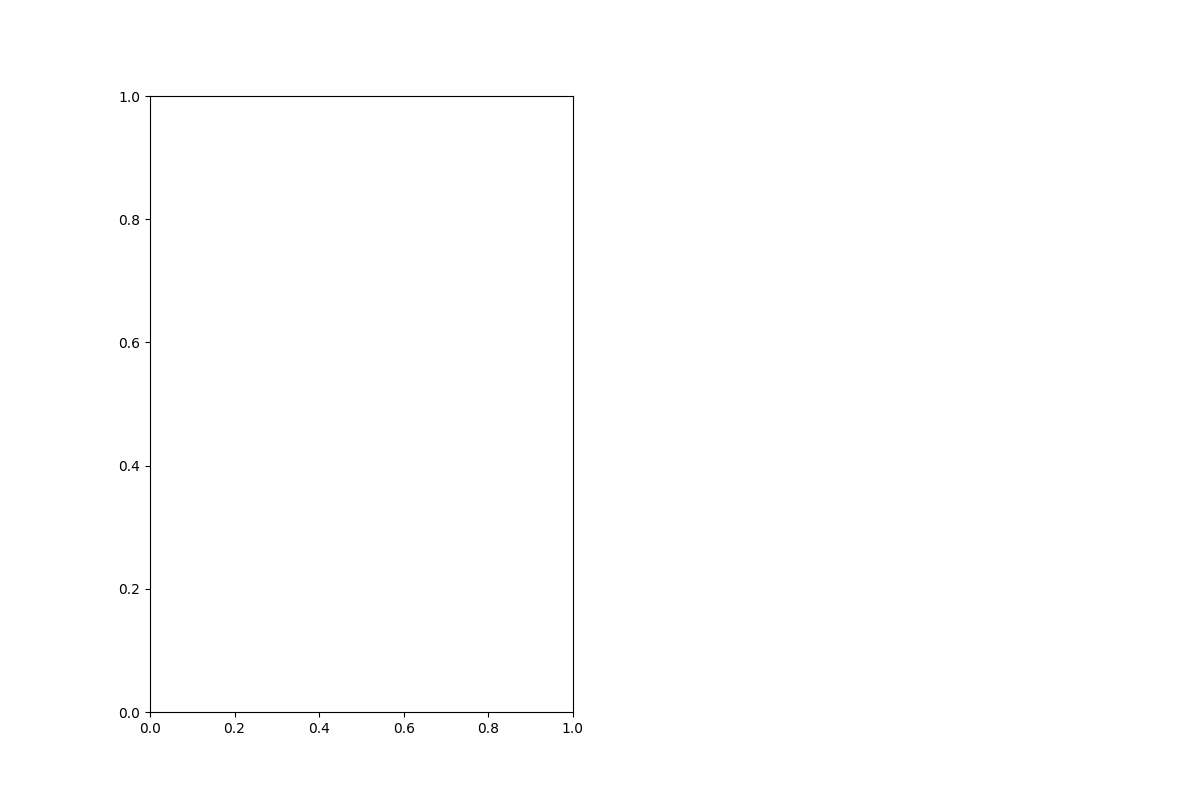

TypeError: swarmplot() got multiple values for argument 'data'

In [45]:
plt.figure(figsize = (12, 8))
plt.subplot(121)
sns.swarmplot('Name', 'PetalLength', data=iris);
plt.subplot(122)
sns.swarmplot('Name', 'PetalLength', data=iris);